In [1]:
import numpy as np
import forcing
import simulation
import plot
from constants import (gravity as g,
                       glen_flow_law as n,
                       ice_density as ρ_I,
                       water_density as ρ_W,
                       glen_flow_law as n,
                       glen_coefficient as A,
                       friction_coefficient as C,
                       bedrock_rigidity as D,
                       theta as θ
                      )
import matplotlib.pyplot as plt

In [2]:
# Simulation parameters
N = 2000
Sbar = .5
Sσ = Sbar/1.
Obar = forcing.Ωbar(C,A,θ,simulation.m(n))
Oσ = 0.0
dt = 1.0

In [3]:
Ω,smb=simulation.initialize_forcing(Sbar,0.5,Obar,0.0,N)
Ω2,smb2=simulation.initialize_forcing(Sbar,0.0,Obar,0.5,N)

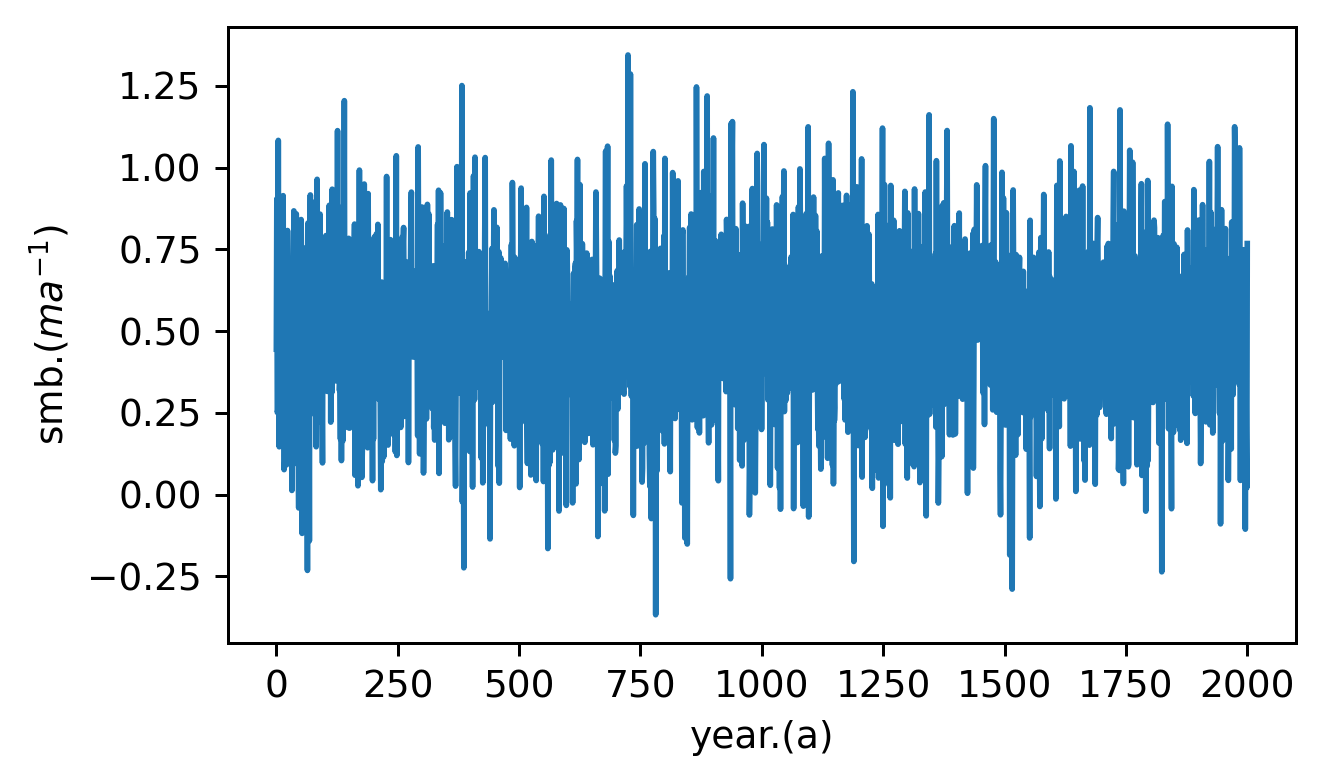

In [4]:
fig,ax,plots=plot.makefig01(1)
plot.figure01(fig,ax,smb,N,dt,label=r'smb.($ma^{-1}$)')


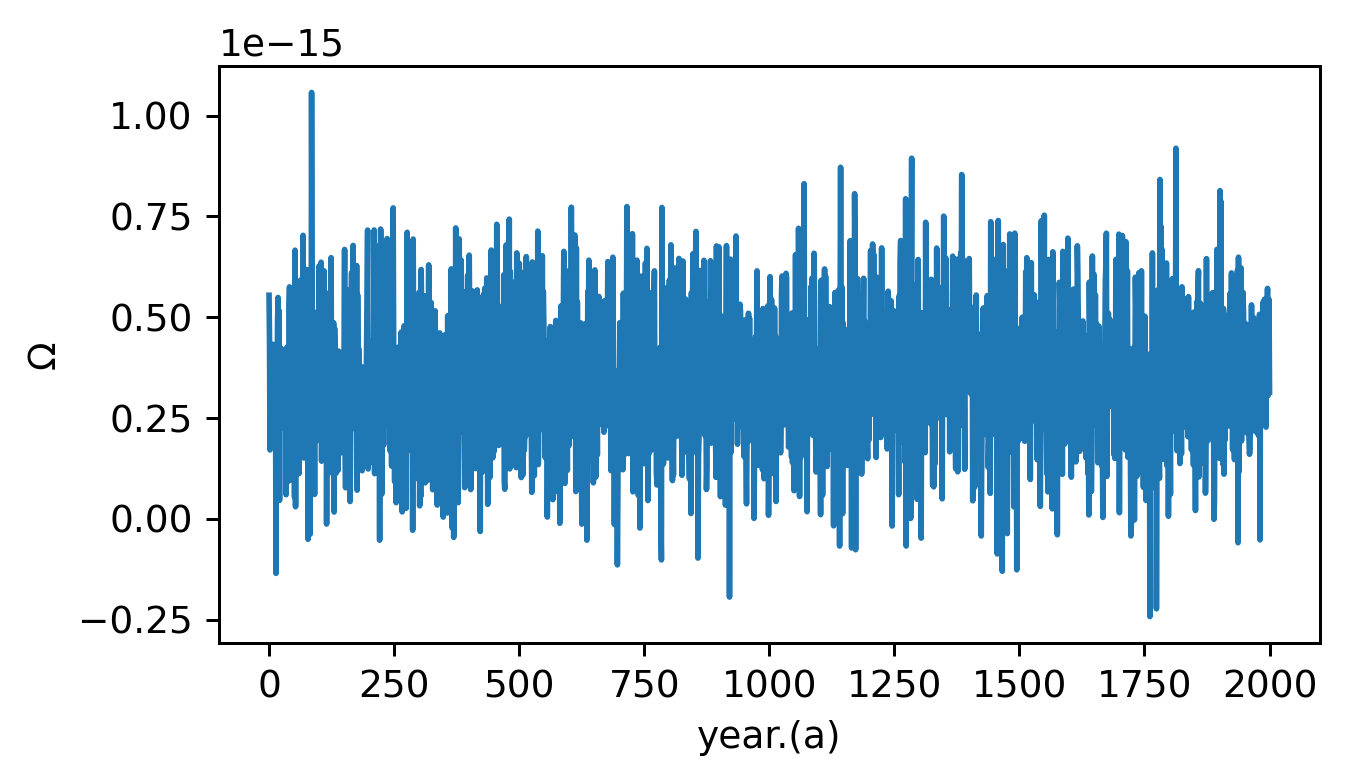

In [5]:
fig,ax,plots=plot.makefig01(1)
plot.figure01(fig,ax,Ω2,N,dt,label=r'Ω')


In [6]:
b0=-100
m0=-2e-3

H0,L0=simulation.equilibrium(1413,184000,b0,m0,Sbar,Obar)
print(H0)
print(L0)

1412.2760859959224
184622.39967033398


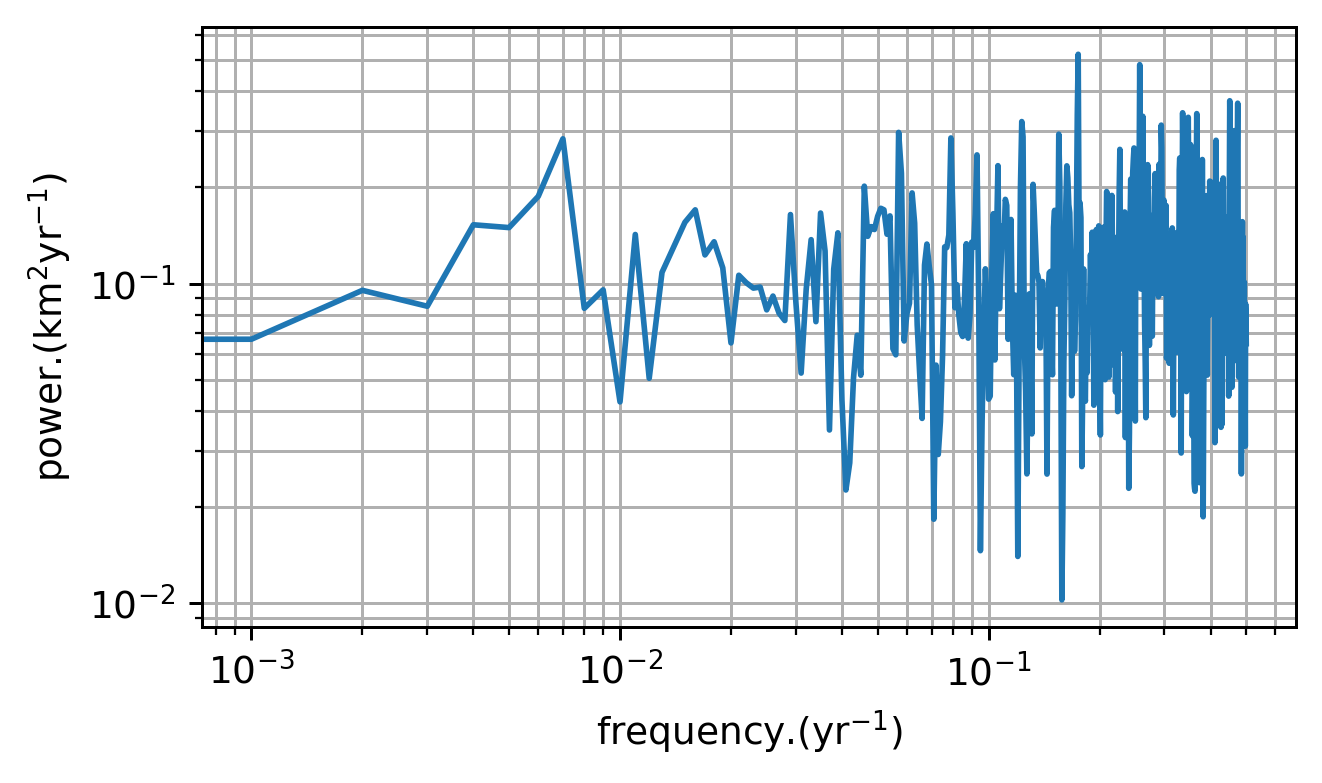

In [9]:
fig3,ax3,plots=plot.makefig01(1)
plot.figure03(fig3,ax3,smb,N,dt)

KeyboardInterrupt: 

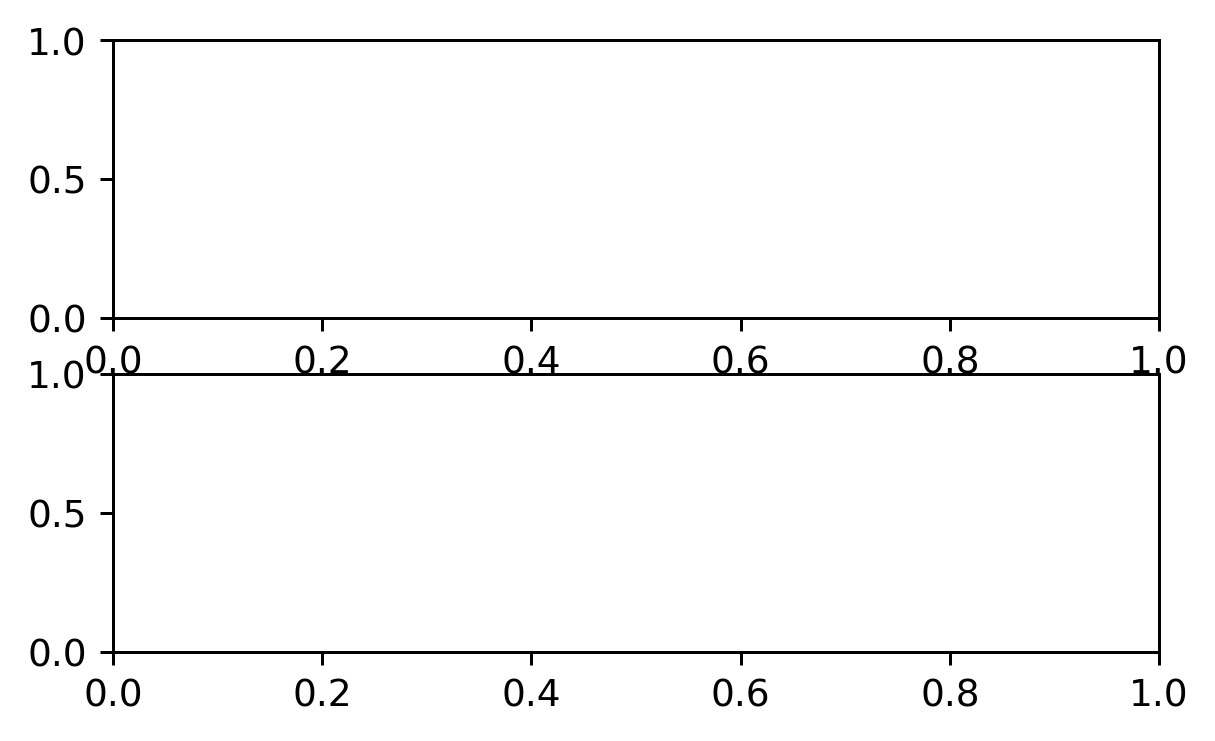

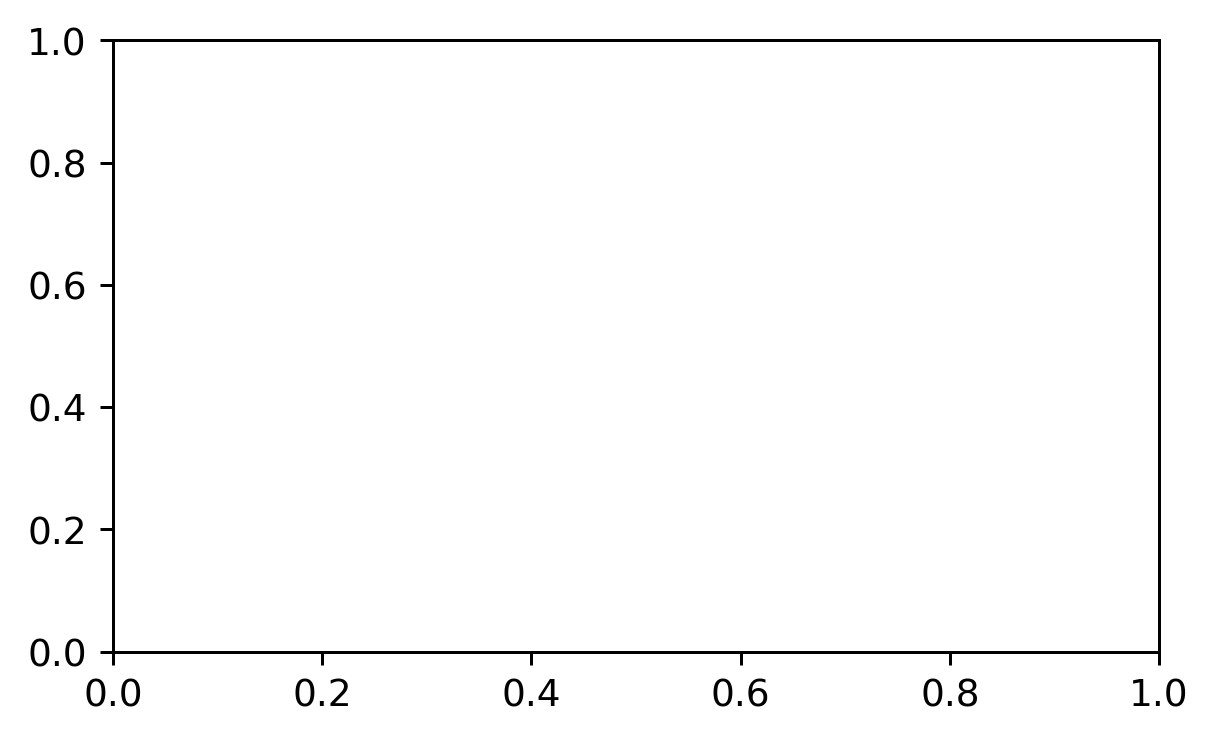

In [7]:
D = np.array([1.0e12])
η = np.array([1.0e20])
fig1,ax1,ax2,plots=plot.makefig02(1)
fig2,ax,plots=plot.makefig01(1)
for i in range(len(D)):
    for j in range(len(η)):
        H,L,M,Q,Qg=simulation.viscoelastic_simulation(H0,L0,m0,b0,Ω2,smb2,N,D[i],η[j])
        plot.figure02(fig1,ax1,ax2,H,L/1000,N,dt)
        plot.figure01(fig2,ax,M,N,dt,label=r'slope')

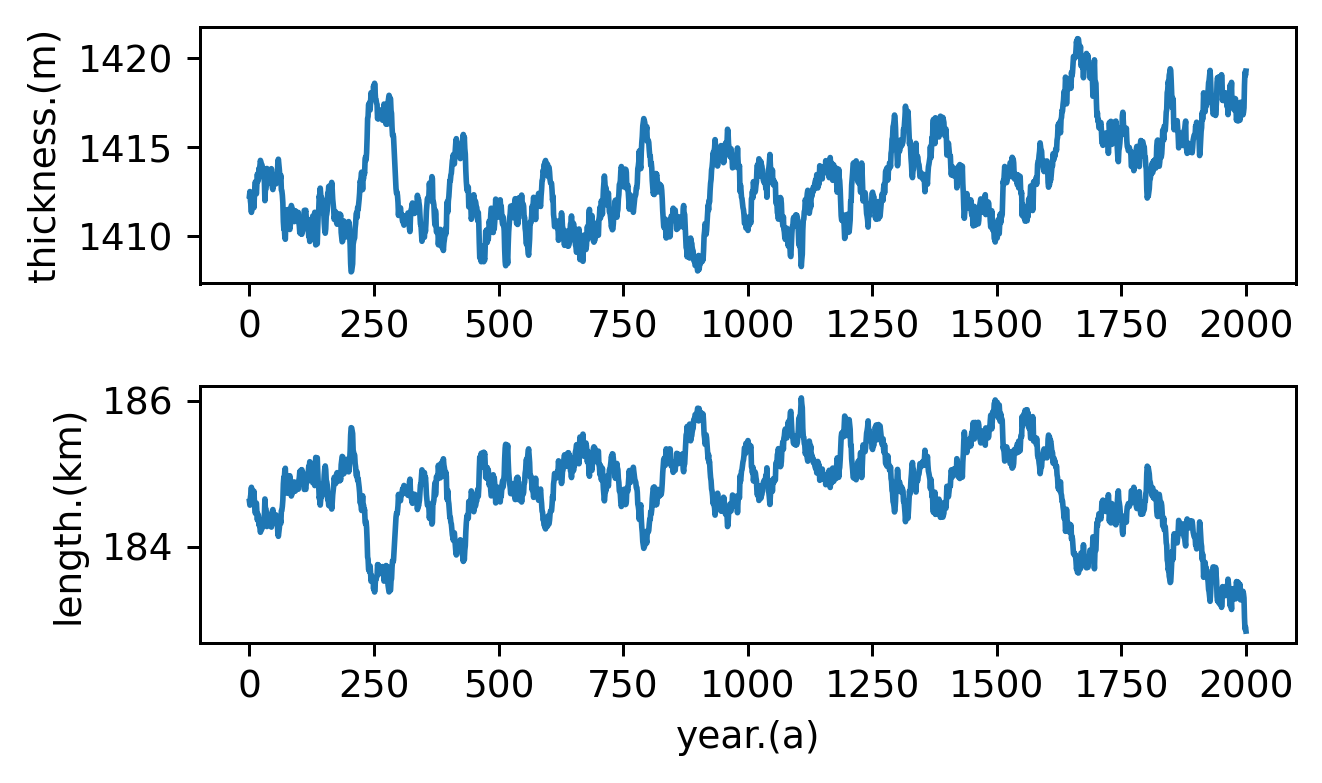

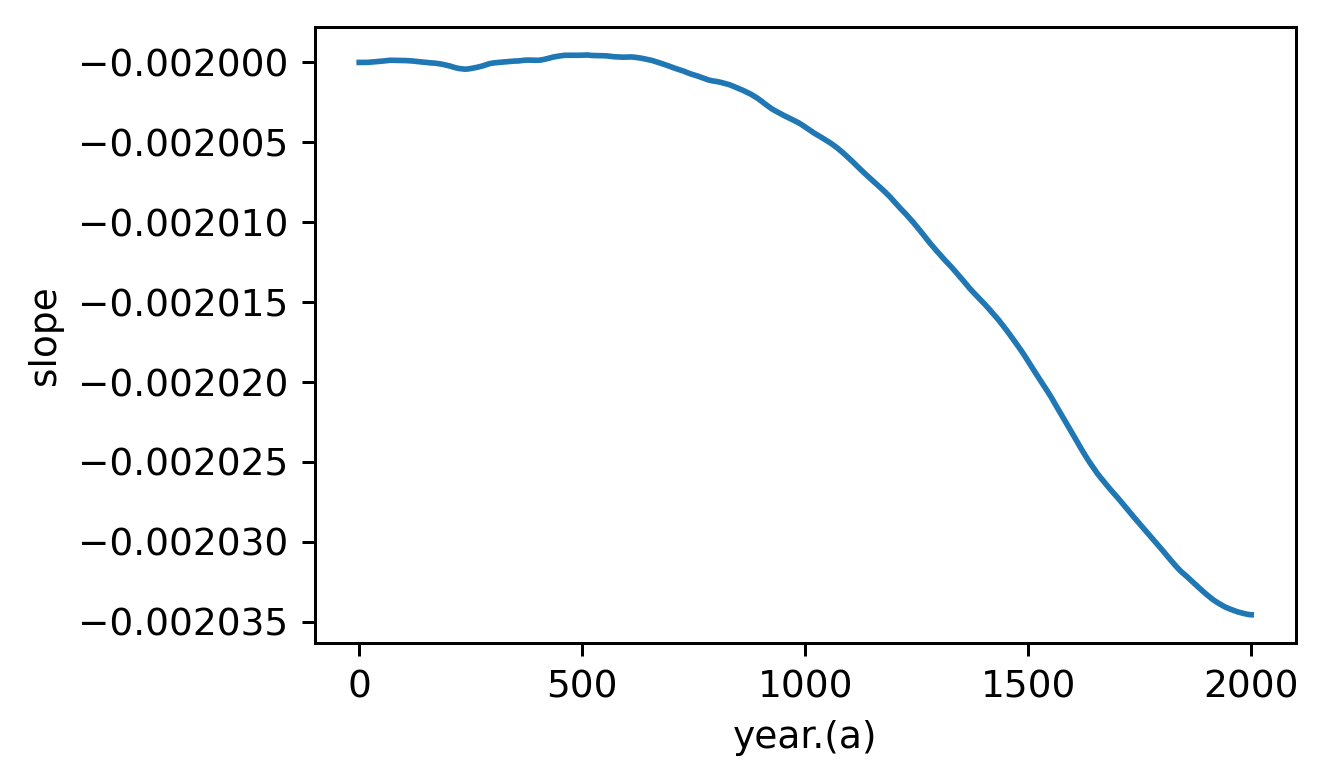

In [13]:
D = np.array([1.0e12])
fig1,ax1,ax2,plots=plot.makefig02(1)
fig2,ax,plots=plot.makefig01(1)
for i in range(len(D)):
    for j in range(len(η)):
        H2,L2,M2,Q2,Qg2=simulation.elastic_simulation(H0,L0,m0,b0,Ω2,smb2,N,D[i])
        plot.figure02(fig1,ax1,ax2,H2,L2/1000,N,dt)
        plot.figure01(fig2,ax,M2,N,dt,label=r'slope')